In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
import pandas as pd
import numpy as np

In [4]:
GLOBAL_RELIGION_DATA = '../data/world-religions/global_raw.csv'
NATIONAL_RELIGION_DATA = '../data/world-religions/national_raw.csv'
LOCAL_RELIGION_DATA = '../data/terrorism_database/terrorism_db.csv'

In [5]:
pop_data_tbl = pd.read_csv(NATIONAL_RELIGION_DATA)

In [6]:
perc_cols =  ['christianity_percent', 'judaism_percent', 'islam_percent', 'buddhism_percent',
              'zoroastrianism_percent', 'hinduism_percent', 'sikhism_percent','shinto_percent',
              'baha’i_percent', 'taoism_percent', 'jainism_percent', 'confucianism_percent',
              'syncretism_percent','animism_percent', 'noreligion_percent', 'otherreligion_percent']

In [7]:
all_cols = ['christianity_all', 'judaism_all', 'islam_all', 'buddhism_all',
              'zoroastrianism_all', 'hinduism_all', 'sikhism_all','shinto_all',
              'baha’i_all', 'taoism_all', 'jainism_all', 'confucianism_all',
              'syncretism_all','animism_all', 'noreligion_all', 'otherreligion_all']

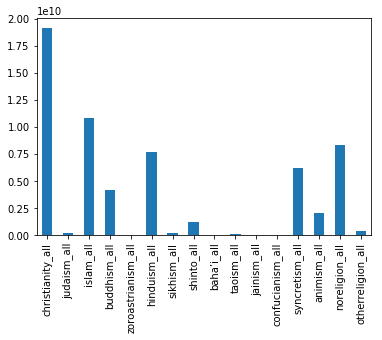

In [8]:
pop_data_tbl[all_cols].sum(axis=0).plot(kind='bar')

In [5]:
pop_data_tbl['majority_religion'] = pop_data_tbl[perc_cols].idxmax(axis=1)

In [6]:
pop_data_tbl['majority_religion'] = pop_data_tbl.majority_religion.map(lambda row: row[:-8])

In [7]:
tbls = []
for key, tbl in pop_data_tbl.groupby('majority_religion'):
    tbl['majority_population'] = tbl[[key + '_all']]
    tbl['majority_ratio'] = tbl[[key + '_percent']]
    tbls.append(tbl[['year', 'state', 'code', 'majority_religion', 'majority_population', 'majority_ratio', 'population']])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [77]:
joined_tbl = pd.concat(tbls).reset_index()

In [68]:
GROWTH_DATA = '../data/growth_data/growth_data_cleaned.csv'

In [69]:
growth_df = pd.read_csv(GROWTH_DATA)

In [70]:
growth_df = growth_df.drop('Unnamed: 0', axis=1)

In [75]:
joined_tbl = joined_tbl.set_index(['state', 'year'])

In [38]:
growth_df[growth_df.year.isin(joined_tbl.year.values)].reset_index(inplace=True)

In [78]:
growth_df = growth_df[growth_df.year.isin(joined_tbl.year.values)]

In [79]:
growth_df.reset_index(inplace=True)

In [84]:
growth_df = growth_df.set_index(['country_name', 'year'])

In [60]:
growth_df.columns

Index(['index', 'country_code', 'growth'], dtype='object')

In [80]:
growth_df = growth_df.drop('index', axis=1)

In [85]:
new_joined_tbl = joined_tbl.join(growth_df, on=('state', 'year'))

In [88]:
new_joined_tbl[new_joined_tbl.growth.notnull()].drop('index', axis=1).to_csv('../data/growth_data/religion_growth_data.csv')

In [ ]:
other_cols = growth_df.columns.tolist()[:4]

In [ ]:
growth_rate_year_df = pd.melt(growth_df, id_vars=other_cols, 
        value_vars=growth_df.columns.tolist()[4:-1], var_name='year', value_name='growth')

In [ ]:
growth_rate_year_df = growth_rate_year_df[growth_rate_year_df.growth.notnull()].reset_index()

In [ ]:
growth_rate_year_df = growth_rate_year_df.drop('index', axis=1)

In [ ]:
growth_rate_year_df.columns = ['country_name', 'country_code', 'ind_name', 'ind_code', 'year', 'growth']

In [ ]:
growth_rate_year_df = growth_rate_year_df.drop(['ind_name', 'ind_code'], axis=1)

In [ ]:
growth_rate_year_df.to_csv('../data/growth_data/growth_data_cleaned.csv')

In [ ]:
joined_tbl_2010 = joined_tbl[joined_tbl['year'] == 2010].reset_index()

In [13]:
HUMAN_FREEDOM_FILE = '../data/human-freedom-index/pf_religion_interpolated.csv'
REL_GROWTH = '../data/growth_data/religion_growth_data.csv'

In [14]:
human_freedom_tbl = pd.read_csv(HUMAN_FREEDOM_FILE)
rel_growth = pd.read_csv(REL_GROWTH)

In [15]:
tbl1 = pd.merge(human_freedom_tbl, rel_growth, left_on = ['year','countries'], right_on = ['year','state'])

In [16]:
tbl1


,Unnamed: 0_x,year,countries,pf_religion,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,Unnamed: 0_y,state,code,majority_religion,majority_population,majority_ratio,population,country_code,growth
0,6,2010,Zimbabwe,8.042963,8.333333,8.528889,7.266667,1200,Zimbabwe,ZIM,christianity,9961179,0.8188,12165294,ZWE,19.675323
1,9,2005,Zimbabwe,8.125944,8.269231,8.680667,7.463889,1199,Zimbabwe,ZIM,christianity,9865000,0.7974,12372000,ZWE,-5.711084
2,10,2000,Zimbabwe,8.037815,8.205128,8.641333,7.338889,1198,Zimbabwe,ZIM,christianity,7563983,0.6482,11669000,ZWE,-3.059190
3,11,1995,Zimbabwe,7.949685,8.141026,8.602000,7.213889,1197,Zimbabwe,ZIM,christianity,8271850,0.7177,11526000,ZWE,0.158026
4,12,1990,Zimbabwe,7.861556,8.076923,8.562667,7.088889,1196,Zimbabwe,ZIM,christianity,6548714,0.6990,9369000,ZWE,6.988553
5,13,1985,Zimbabwe,7.773426,8.012821,8.523333,6.963889,1195,Zimbabwe,ZIM,christianity,5447857,0.6502,8379000,ZWE,6.944388
6,14,1980,Zimbabwe,7.685296,7.948718,8.484000,6.838889,1194,Zimbabwe,ZIM,christianity,4347000,0.6126,7096000,ZWE,14.420684
7,15,1975,Zimbabwe,7.597167,7.884615,8.444667,6.713889,1193,Zimbabwe,ZIM,christianity,3490253,0.5558,6280000,ZWE,-1.931223
8,16,1970,Zimbabwe,7.509037,7.820513,8.405333,6.588889,1192,Zimbabwe,ZIM,christianity,2773506,0.5223,5310000,ZWE,22.565151
9,17,1965,Zimbabwe,7.420907,7.756410,8.366000,6.463889,61,Zimbabwe,ZIM,animism,2206000,0.4930,4475000,ZWE,4.910571


In [17]:
tbl1 = tbl1[['state','year','majority_religion','pf_religion', 'pf_religion_estop','pf_religion_harassment','pf_religion_restrictions']]


In [18]:
tbl1

,state,year,majority_religion,pf_religion,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions
0,Zimbabwe,2010,christianity,8.042963,8.333333,8.528889,7.266667
1,Zimbabwe,2005,christianity,8.125944,8.269231,8.680667,7.463889
2,Zimbabwe,2000,christianity,8.037815,8.205128,8.641333,7.338889
3,Zimbabwe,1995,christianity,7.949685,8.141026,8.602000,7.213889
4,Zimbabwe,1990,christianity,7.861556,8.076923,8.562667,7.088889
5,Zimbabwe,1985,christianity,7.773426,8.012821,8.523333,6.963889
6,Zimbabwe,1980,christianity,7.685296,7.948718,8.484000,6.838889
7,Zimbabwe,1975,christianity,7.597167,7.884615,8.444667,6.713889
8,Zimbabwe,1970,christianity,7.509037,7.820513,8.405333,6.588889
9,Zimbabwe,1965,animism,7.420907,7.756410,8.366000,6.463889


In [19]:
tbl1.to_csv('../data/growth_data/interpolated_pf_religion.csv')

In [21]:
tbl1.values

array([['Zimbabwe', 2010, 'christianity', ..., 8.333333332999999,
        8.528888889, 7.266666667000001],
       ['Zimbabwe', 2005, 'christianity', ..., 8.269230768923078,
        8.680666666699999, 7.463888889],
       ['Zimbabwe', 2000, 'christianity', ..., 8.205128204846153,
        8.6413333334, 7.338888889],
       ...,
       ['Albania', 1995, 'islam', ..., 8.75, 9.684444444, 8.705555556],
       ['Albania', 1990, 'islam', ..., 8.75, 9.684444444, 8.705555556],
       ['Albania', 1985, 'islam', ..., 8.75, 9.684444444, 8.705555556]],
      dtype=object)

In [33]:
human_tbl_2010 = human_freedom_tbl.set_index('countries')

In [34]:
human_tbl_2010

,Unnamed: 0,year,pf_religion,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions
countries,,,,,,
Zimbabwe,0,2016,6.427778,2.500000,9.333333,7.450000
Zimbabwe,1,2015,6.376296,2.500000,9.362222,7.266667
Zimbabwe,2,2014,6.288704,2.500000,8.591111,7.775000
Zimbabwe,3,2013,6.980556,3.750000,9.555556,7.636111
Zimbabwe,4,2012,7.061111,3.750000,9.288889,8.144444
Zimbabwe,5,2011,6.735185,3.750000,8.866667,7.588889
Zimbabwe,6,2010,8.042963,8.333333,8.528889,7.266667
Zimbabwe,7,2009,8.341111,8.333333,8.962222,7.727778
Zimbabwe,8,2008,8.214074,8.333333,8.720000,7.588889


In [ ]:
joined_freedom_tbl = joined_tbl_2010.set_index(['state']).join(human_tbl_2010)

In [5]:
df = pd.read_csv('../data/human-freedom-index/religion_freedom.csv')

In [11]:
vals = []
for key, tbl in df.groupby(['majority_religion']):
    row = [key]
    for feature in ('pf_religion', 'pf_religion_estop', 'pf_religion_harassment', 'pf_religion_restrictions'):
        sub_tbl = tbl[tbl[feature].notnull()]
        n = len(sub_tbl)
        total_population = sub_tbl.population.sum()
        if feature == 'pf_religion_estop' and key == 'animism':
            row.append(6.017605)
        else:
            row.append((sub_tbl[feature] * sub_tbl.population).sum()  / (total_population))
    vals.append(row)

In [12]:
df[df['majority_religion'] == 'animism'].pf_religion

0    8.261667
Name: pf_religion, dtype: float64

In [13]:
row = ['total_average']
for feat in ('pf_religion', 'pf_religion_estop', 'pf_religion_harassment', 'pf_religion_restrictions'):
    sub_tbl = df[df[feat].notnull()]
    row.append((sub_tbl[feat] * sub_tbl.population).sum()  / (sub_tbl.population.sum()))
vals.append(row)

In [14]:
new_df = pd.DataFrame(vals, columns=['religion', 'pf_religion', 'pf_religion_estop',
                                     'pf_religion_harassment', 'pf_religion_restrictions'])

In [15]:
new_df

,religion,pf_religion,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions
0,animism,8.261667,6.017605,9.351111,7.172222
1,buddhism,7.567479,6.267668,8.249378,7.491306
2,christianity,8.119228,8.616083,8.747090,7.013463
3,hinduism,8.397707,9.998255,9.375389,5.819477
4,islam,6.492883,4.732706,7.737647,6.923430
5,judaism,9.653704,10.000000,9.333333,9.627778
6,noreligion,9.120370,10.000000,9.444444,7.916667
7,shinto,7.827407,5.833333,8.760000,8.888889
8,syncretism,5.429006,0.117905,8.489045,7.680068
9,total_average,7.211640,6.017605,8.590692,6.968091


In [ ]:
new_df.to_csv('../data/human-freedom-index/religion_pf_freedom.csv')

In [ ]:
df = pd.read_csv('../data/human-freedom-index/religion_pf_freedom.csv')

In [ ]:
res = []
for val in df.values:
    res.append({'religion': val[1], 'pf_religion': val[2], 'pf_religion_estop': val[3],
                'pf_religion_harrasment': val[4], 'pf_religion_restrictions': val[5]})
res

In [ ]:
df.drop(['Unnamed: 0'], axis=1).set_index('religion').plot(kind='bar')

In [ ]:
df.drop(['Unnamed: 0'], axis=1).set_index('religion').plot(kind='bar')